In [35]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Starting to analyze and process both sets of mortality data

## All Deaths with Covid

In [3]:
df = pd.read_pickle("../../Pickles/cdc_mortality_df.pkl")

In [4]:
df.head(10)

,State,Year,Deaths
0,Alabama,2013,8695
1,Alabama,2014,8254
2,Alabama,2015,9256
3,Alabama,2016,9020
4,Alabama,2017,9030
5,Alabama,2018,9182
6,Alabama,2020,8842
7,Alaska,2013,686
8,Alaska,2014,622
9,Alaska,2015,696


In [5]:
df = df.astype({"Deaths":"int64"})

In [6]:
df["Death Difference"] = df["Deaths"].diff()

In [7]:
df.loc[(df["Year"]==2013), "Death Difference"] = np.nan

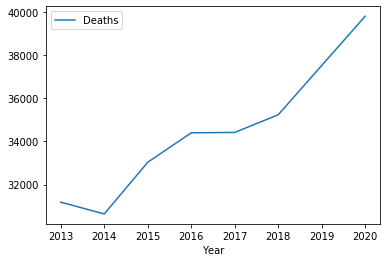

In [27]:
df.loc[(df["State"]=="Florida")].drop(columns=["Death Difference"]).set_index("Year").plot()

In [13]:
df.loc[(df["Death Difference"]>0) & (df["Year"]==2020)].sort_values("Death Difference", ascending=False).head(5)

,State,Year,Deaths,Death Difference
69,Florida,2020,39184,3956.0
34,California,2020,49660,2294.0
300,Tennessee,2020,13126,1248.0
153,Massachusetts,2020,10996,807.0
286,South Carolina,2020,9467,777.0


In [71]:
df_to_merge = df.loc[(df["Year"]==2020)].reset_index(drop=True)

In [73]:
df_to_merge.to_pickle("../../Pickles/cdc_morality_to_merge.pkl")

## Ploting Top Three States with Highest Death Difference

In [79]:
def plot_state(astate):
    deaths_df = df.loc[(df["State"]==astate)].drop(columns=["Death Difference"])
    diff_df = df.loc[(df["State"]==astate)].drop(columns=["Deaths"])
    
    sns.set_style("white")
    fig, ax = plt.subplots(figsize=(12,6))
    sns.lineplot(data=deaths_df,
                 x="Year",
                 y="Deaths");
    
    sns.set_style("white")
    fig, ax = plt.subplots(figsize=(12,6))
    sns.lineplot(data=diff_df,
                 x="Year",
                 y="Death Difference");

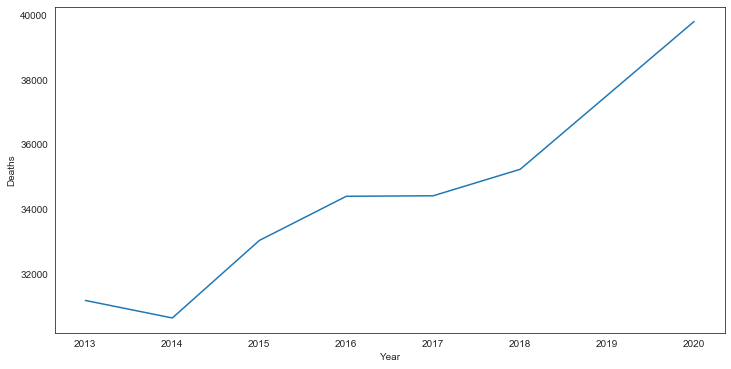

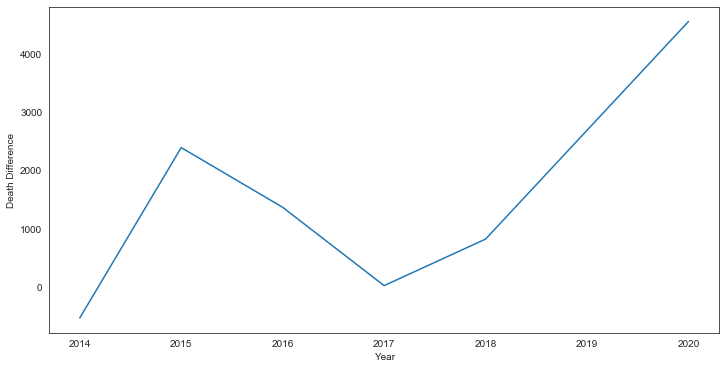

In [80]:
plot_state("Florida")

In [46]:
cali_sample = df.loc[(df["State"]=="California")].drop(columns=["Deaths"])

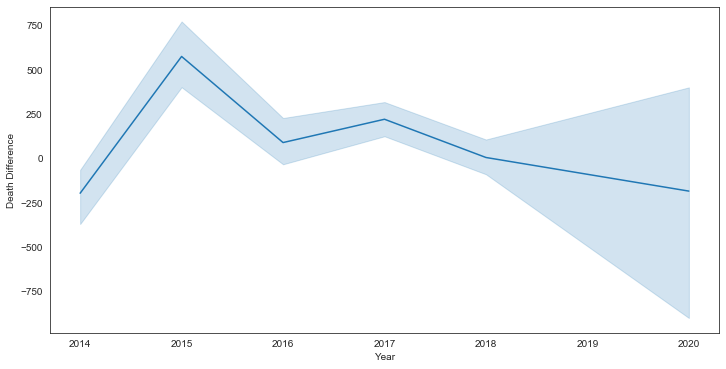

In [56]:

sns.set_style("white")
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=df,
             x="Year",
             y="Death Difference");

## All Deaths without Covid

In [48]:
df2 = pd.read_pickle("Datasets/cdc_mortality_no_covid_df.pkl")

In [49]:
df2["Death Difference no Covid"] = df2["Deaths"].diff()

In [56]:
df2 = df2.rename(columns={"Deaths":"Deaths no Covid"})

In [57]:
df2.loc[(df2["Year"]==2013), "Death Difference no Covid"] = np.nan

In [58]:
df2.loc[(df2["Death Difference no Covid"]>0) & (df2["Year"]==2020)]

,State,Year,Deaths no Covid,Death Difference no Covid
20,Arizona,2020,10540,347.0
27,Arkansas,2020,5680,277.0
34,California,2020,49562,2196.0
41,Colorado,2020,7326,733.0
62,District of Columbia,2020,1005,182.0
69,Florida,2020,39133,3905.0
83,Hawaii,2020,2136,149.0
90,Idaho,2020,2547,100.0
97,Illinois,2020,19365,669.0
111,Iowa,2020,5355,73.0


In [61]:
merged_df = df.merge(df2)

In [65]:
merged_df.loc[df["Year"]==2020]

,State,Year,Deaths,Death Difference,Deaths no Covid,Death Difference no Covid
6,Alabama,2020,8589,-593.0,8587,-595.0
13,Alaska,2020,600,-98.0,600,-98.0
20,Arizona,2020,10540,347.0,10540,347.0
27,Arkansas,2020,5680,277.0,5680,277.0
34,California,2020,49660,2294.0,49562,2196.0
41,Colorado,2020,7353,760.0,7326,733.0
48,Connecticut,2020,0,-5311.0,0,-5311.0
55,Delaware,2020,1295,-355.0,1295,-355.0
62,District of Columbia,2020,1006,183.0,1005,182.0
69,Florida,2020,39184,3956.0,39133,3905.0
